# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# stundent details example: John S. 9812
#                       student details 1:  David Kitunov 4586
# (if exists)           student details 2:  Naor Abud 8273
# (if exists)           student details 3: 
# (if exists)           student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Prompt 1 — EDA & Narration (Heb/Eng mix)
“Act as a data-science TA. I’m analyzing the Kaggle Titanic training set (Survived is the binary target).
Give 3–4 EDA visuals that support the ML flow (feature distributions by target, interactions like Pclass×Sex, and a simple table).
Use matplotlib only, clear titles/axis labels in English, and add a 1-2 sentence takeaway per plot (in Hebrew). Return clean, runnable code.”

Prompt 2 — Modeling Grid (F1, 5-Fold)
“I need a compact sklearn Pipeline with ColumnTransformer (impute + One-Hot), optional SelectKBest, and a GridSearchCV (StratifiedKFold=5) scored by F1(pos=1).
Include two models only: LogisticRegression and a constrained DecisionTree (max_depth 3–5).
IMPORTANT: split grids so that when selector='passthrough' you don’t set selector__k. Do CV only (no refit), and print a tidy DataFrame with CV_F1 sorted desc.”

Prompt 3 — Debugging Grid/Pipeline
“I get AttributeError: 'str' object has no attribute 'set_params' during GridSearch.
Inspect my param grid and explain what causes it (hint: setting selector__k while selector='passthrough').
Rewrite the two grids correctly.”

Prompt 4 — Executive summary & test evaluation
“Write a concise executive summary (Hebrew, 5–7 lines) describing: the best permutation from CV (feature-engineering + model + hyper-params), why it likely works on Titanic (feature importance intuition: Sex, Pclass, Age, Fare), and how I’ll refit on the full train (Part 4) and report F1(pos=1) on test (Part 5).” 
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

This project is a binary classification task on the Titanic dataset: predict whether a passenger survived (Survived=1) using features such as Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked. We treat Survived=1 as the positive class and use F1-score (positive=1) as the quality metric for both model selection (via Stratified 5-Fold Cross-Validation) and final test evaluation. The pipeline performs imputation for missing values, one-hot encoding for categorical variables, and optionally scaling of numeric features and feature selection (e.g., SelectKBest). We compare several models with different hyperparameters using GridSearchCV, pick the best-scoring configuration, then retrain it on the full training set and report performance on the test set.

## Part 2 - Initial Preparations 
You could add as many code cells as needed

##  Load data & quick look

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

train_path = r"C:\Users\david\OneDrive\Рабочий стол\titanic\titanic_train.csv"
df_train = pd.read_csv(train_path)


test_path = r"C:\Users\david\OneDrive\Рабочий стол\titanic\titanic_test.csv"
df_test = pd.read_csv(test_path)

##  First 5 rows Train Set

In [2]:
print("First 5 rows:")
display(df_train.head())

print("\nSchema summary:")
schema = pd.DataFrame({
    "dtype": df_train.dtypes.astype(str),
    "n_missing": df_train.isnull().sum(),
    "n_unique": df_train.nunique()
})
display(schema)

First 5 rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0



Schema summary:


,dtype,n_missing,n_unique
Pclass,int64,0,3
Sex,int64,0,2
Age,float64,0,85
SibSp,int64,0,7
Parch,int64,0,7
Fare,float64,0,222
Embarked,int64,0,4
Survived,int64,0,2


##  First 5 rows Test Set

In [26]:
print("First 5 rows:")
display(df_test.head())

print("\nSchema summary:")
schema = pd.DataFrame({
    "dtype": df_test.dtypes.astype(str),
    "n_missing": df_test.isnull().sum(),
    "n_unique": df_test.nunique()
})
display(schema)

First 5 rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1



Schema summary:


,dtype,n_missing,n_unique
Pclass,int64,0,3
Sex,int64,0,2
Age,float64,0,54
SibSp,int64,0,6
Parch,int64,0,5
Fare,float64,0,102
Embarked,int64,0,4
Survived,int64,0,2



df['Survived'].value_counts().sort_index().plot(kind="bar")
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = died, 1 = survived)")
plt.ylabel("Count")
plt.show()

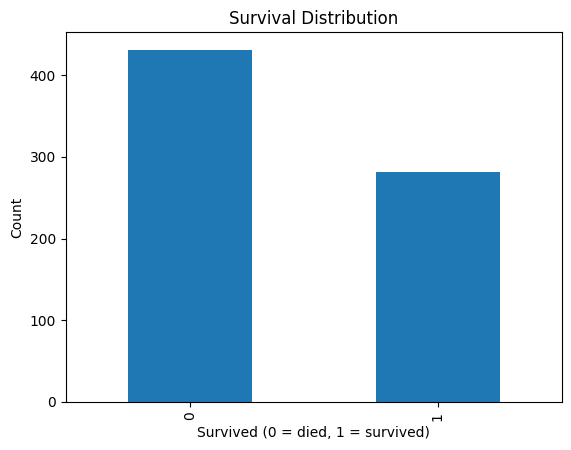

In [27]:

# === כמה גרפים בסיסיים ===

# 1) התפלגות הישרדות
df_train['Survived'].value_counts().sort_index().plot(kind="bar")
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = died, 1 = survived)")
plt.ylabel("Count")
plt.show()

**Goal:** check class balance of the target.

**Takeaway:** Most passengers **did not survive**, so the target is imbalanced and this should be kept in mind later.

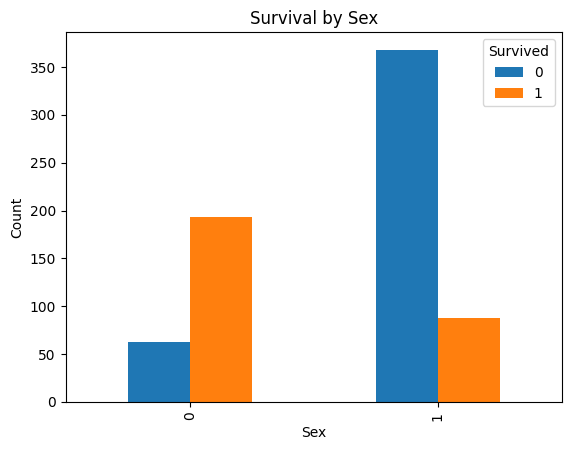

In [28]:
(df_train.groupby(['Sex','Survived']).size()
   .unstack(fill_value=0)
   .plot(kind='bar'))
plt.title("Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

**Goal:** test whether gender is associated with survival.

**Takeaway:** **Females survived much more** than males — consistent with the historical “women and children first” policy.

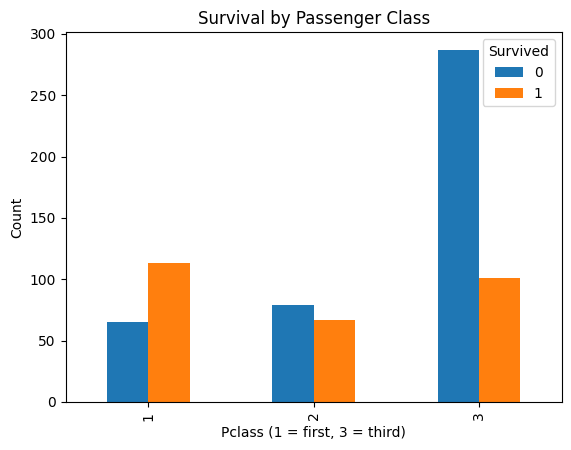

In [29]:
(df_train.groupby(['Pclass','Survived']).size()
   .unstack(fill_value=0)
   .plot(kind='bar'))
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass (1 = first, 3 = third)")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

**Goal:** check whether ticket class relates to survival.

**Takeaway:** **First-class passengers** had substantially **higher survival**; **third class** had the lowest.

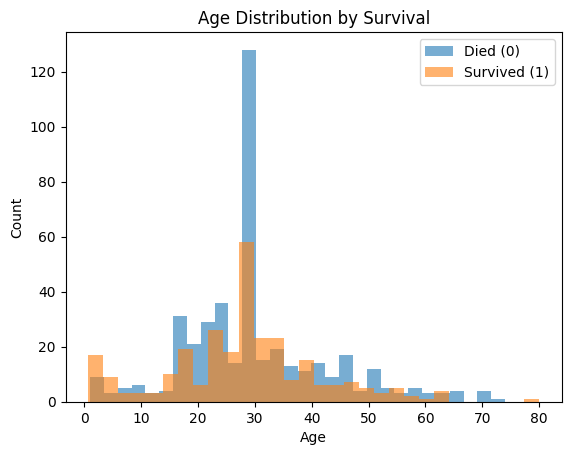

In [30]:
plt.hist(df_train[df_train['Survived']==0]['Age'].dropna(), bins=30, alpha=0.6, label='Died (0)')
plt.hist(df_train[df_train['Survived']==1]['Age'].dropna(), bins=30, alpha=0.6, label='Survived (1)')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

**Goal:** examine whether age influenced survival.

**Takeaway:** Children/younger passengers show relatively **better survival**, while older (especially males) died more often.

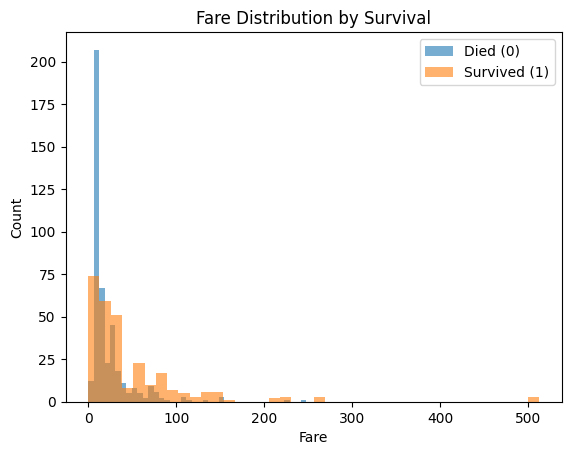

In [31]:
plt.hist(df_train[df_train['Survived']==0]['Fare'].dropna(), bins=40, alpha=0.6, label='Died (0)')
plt.hist(df_train[df_train['Survived']==1]['Fare'].dropna(), bins=40, alpha=0.6, label='Survived (1)')
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend()
plt.show()

**Goal:** test whether higher ticket price (proxy for class) relates to survival.

**Takeaway:** **Higher fares** (i.e., higher classes) are associated with **higher survival**.

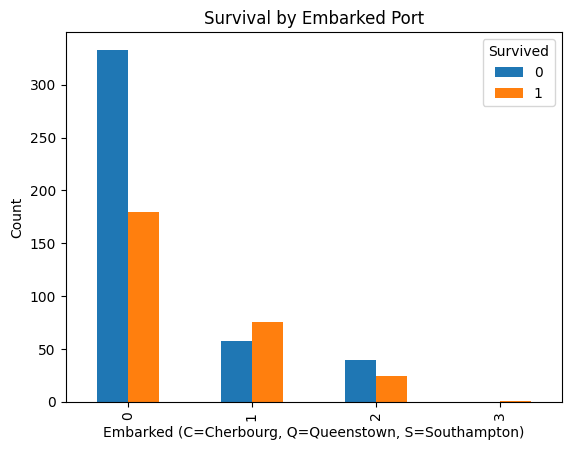

In [32]:
(df_train.groupby(['Embarked','Survived']).size()
   .unstack(fill_value=0)
   .plot(kind='bar'))
plt.title("Survival by Embarked Port")
plt.xlabel("Embarked (C=Cherbourg, Q=Queenstown, S=Southampton)")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()

**Goal:** explore whether port of embarkation is linked to survival.

**Takeaway:** Passengers embarking at **Cherbourg (C)** show **higher survival**, likely reflecting class/price differences.

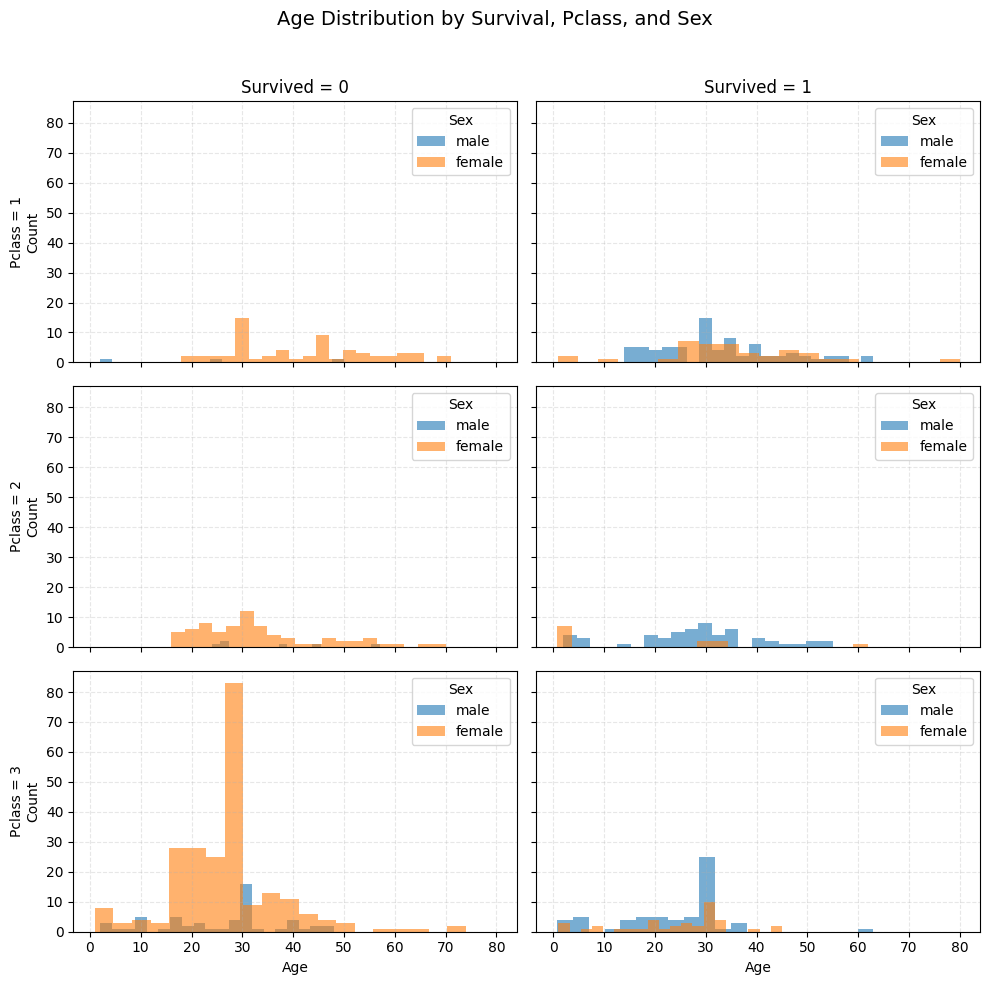

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# קח את הדאטה-פריים הנכון
base_df = df_train if 'df_train' in globals() else train_df

# נשמור רק שורות עם העמודות הנחוצות
dff = base_df.dropna(subset=['Age', 'Pclass', 'Survived', 'Sex']).copy()

# ננרמל את Sex למחרוזות "male"/"female" אם צריך
if dff['Sex'].dtype != object:
    dff['Sex_str'] = dff['Sex'].map({0: 'male', 1: 'female'})
else:
    dff['Sex_str'] = dff['Sex'].astype(str).str.lower()

classes   = sorted(dff['Pclass'].unique())
surv_vals = [0, 1]
sexes     = ['male', 'female']

fig, axes = plt.subplots(len(classes), len(surv_vals), figsize=(10, 10),
                         sharex=True, sharey=True)
axes = np.atleast_2d(axes)  # מבטיח מטריצה גם כשיש שורה/עמודה אחת

for i, pc in enumerate(classes):
    for j, sv in enumerate(surv_vals):
        ax = axes[i, j]
        sub = dff[(dff['Pclass'] == pc) & (dff['Survived'] == sv)]
        drawn = False
        for sex in sexes:
            ages = sub.loc[sub['Sex_str'] == sex, 'Age'].dropna()
            if len(ages):
                ax.hist(ages, bins=20, alpha=0.6, label=sex)
                drawn = True
        if i == 0:
            ax.set_title(f"Survived = {sv}")
        if j == 0:
            ax.set_ylabel(f"Pclass = {pc}\nCount")
        if i == len(classes) - 1:
            ax.set_xlabel("Age")
        if drawn:
            ax.legend(title="Sex")
        ax.grid(True, linestyle='--', alpha=0.3)

fig.suptitle("Age Distribution by Survival, Pclass, and Sex", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Goal:** examine **interactions** between three features at once.

**Takeaway:** In **1st class**, females survive at most ages; in **3rd class**, many young females did **not** survive and most males died; children generally did better across classes.

## Part 3 - Experiments
You could add as many code cells as needed

In [42]:
# Part 3 — Experiments (CV only, no full training here)
%matplotlib inline
import pandas as pd
from pathlib import Path

def safe_read_csv(name: str) -> pd.DataFrame:
    p1 = Path(name); p2 = Path('/mnt/data')/name
    if p1.exists(): return pd.read_csv(p1)
    if p2.exists(): return pd.read_csv(p2)
    raise FileNotFoundError(f"Could not find {name}")

train = safe_read_csv(r"C:\Users\david\OneDrive\Рабочий стол\titanic\titanic_train.csv")
y = train['Survived']
X = train.drop(columns=['Survived'])

display(train.head(5))
print("Train shape:", train.shape)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


Train shape: (712, 8)


In [47]:
# ===== גריד מתוקן: מפוצל כדי לא לערבב selector__k כש selector='passthrough' =====
grids = []

# ---------- Logistic Regression ----------
# ללא Selector
grids.append({
    'preprocess__num__scaler': ['passthrough', StandardScaler()],
    'selector': ['passthrough'],
    'clf': [LogisticRegression(max_iter=200, solver='liblinear')],
    'clf__C': [0.5, 1.0],
    'clf__class_weight': [None, 'balanced'],
})

# עם SelectKBest
grids.append({
    'preprocess__num__scaler': ['passthrough', StandardScaler()],
    'selector': [SelectKBest(score_func=mutual_info_classif)],
    'selector__k': [10],
    'clf': [LogisticRegression(max_iter=200, solver='liblinear')],
    'clf__C': [0.5, 1.0],
    'clf__class_weight': [None, 'balanced'],
})

# ---------- Decision Tree (מוגבל עומק) ----------
# ללא Selector
grids.append({
    'preprocess__num__scaler': ['passthrough'],  # לעץ לא צריך סקיילינג
    'selector': ['passthrough'],
    'clf': [DecisionTreeClassifier(random_state=42)],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5],
    'clf__min_samples_leaf': [2, 4],
})

# עם SelectKBest
grids.append({
    'preprocess__num__scaler': ['passthrough'],
    'selector': [SelectKBest(score_func=mutual_info_classif)],
    'selector__k': [10],
    'clf': [DecisionTreeClassifier(random_state=42)],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5],
    'clf__min_samples_leaf': [2, 4],
})

# חשוב: בחלק 3 אנו רק מריצים CV, לכן refit=False (האימון המלא יהיה בחלק 4)
gs = GridSearchCV(
    estimator=pipe,
    param_grid=grids,
    scoring=scorer,           # F1(pos=1)
    cv=cv,                    # StratifiedKFold(5)
    n_jobs=-1,
    refit=False,              # <-- לא מאמנים מחדש על כל ה-train בחלק 3
    verbose=1
)


In [48]:
gs.fit(X, y)

import pandas as pd

res = pd.DataFrame(gs.cv_results_).copy()
res['CV_F1'] = res['mean_test_score']

def model_name(o): 
    s = str(o); return s.split('(')[0]

res['model'] = res['param_clf'].apply(model_name)

cols = [
    'CV_F1','std_test_score','rank_test_score','model',
    'param_preprocess__num__scaler','param_selector','param_selector__k',
    'param_clf__C','param_clf__class_weight',
    'param_clf__criterion','param_clf__max_depth','param_clf__min_samples_leaf'
]
cols = [c for c in cols if c in res.columns]

res_view = res[cols].sort_values('CV_F1', ascending=False).reset_index(drop=True)
display(res_view.head(30))

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,CV_F1,std_test_score,rank_test_score,model,param_preprocess__num__scaler,param_selector,param_selector__k,param_clf__C,param_clf__class_weight,param_clf__criterion,param_clf__max_depth,param_clf__min_samples_leaf
0,0.732696,0.025349,1,LogisticRegression,passthrough,passthrough,NaN,1.0,balanced,NaN,NaN,NaN
1,0.731625,0.038981,2,LogisticRegression,StandardScaler(),SelectKBest(score_func=<function mutual_info_c...,10.0,1.0,None,NaN,NaN,NaN
2,0.731617,0.025400,3,LogisticRegression,passthrough,passthrough,NaN,0.5,balanced,NaN,NaN,NaN
3,0.731441,0.038462,4,LogisticRegression,StandardScaler(),passthrough,NaN,0.5,None,NaN,NaN,NaN
4,0.730465,0.028828,5,LogisticRegression,StandardScaler(),passthrough,NaN,1.0,balanced,NaN,NaN,NaN
5,0.730415,0.042202,6,LogisticRegression,passthrough,SelectKBest(score_func=<function mutual_info_c...,10.0,0.5,None,NaN,NaN,NaN
6,0.729203,0.025920,7,LogisticRegression,StandardScaler(),passthrough,NaN,0.5,balanced,NaN,NaN,NaN
7,0.729157,0.040841,8,LogisticRegression,passthrough,SelectKBest(score_func=<function mutual_info_c...,10.0,1.0,None,NaN,NaN,NaN
8,0.729095,0.041225,9,LogisticRegression,passthrough,SelectKBest(score_func=<function mutual_info_c...,10.0,0.5,balanced,NaN,NaN,NaN
9,0.728138,0.026185,10,LogisticRegression,StandardScaler(),SelectKBest(score_func=<function mutual_info_c...,10.0,1.0,balanced,NaN,NaN,NaN


In [49]:
# שליפת הפרמוטציה המנצחת לפי ממוצע F1 ב-5 ה-folds
best_idx = res['CV_F1'].idxmax()
best_params_part3 = gs.cv_results_['params'][best_idx]   # dict
best_cv_f1 = res.loc[best_idx, 'CV_F1']

print("Best CV_F1:", round(best_cv_f1, 4))
print("Best permutation params:")
for k, v in best_params_part3.items():
    print(" ", k, ":", v)

# נשמור במשתנה לשימוש מיידי בחלק 4 (אימון מלא):
best_params_for_part4 = best_params_part3

Best CV_F1: 0.7327
Best permutation params:
  clf : LogisticRegression(max_iter=200, solver='liblinear')
  clf__C : 1.0
  clf__class_weight : balanced
  preprocess__num__scaler : passthrough
  selector : passthrough


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [50]:
# ==== Part 4: re-train the full train set with the winning permutation ====
# Assumes Part 3 set: best_params_for_part4 (dict), and X, y from train.

from pathlib import Path
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# --- safety checks ---
assert 'best_params_for_part4' in globals(), "Run Part 3 (cell that sets best_params_for_part4) first."
assert 'X' in globals() and 'y' in globals(), "X,y from the train set are required."

# Rebuild the same preprocess & base pipeline as in Part 3
num_features = [c for c in X.columns if c in ['Age','Fare','SibSp','Parch']]
cat_features = [c for c in X.columns if c in ['Pclass','Sex','Embarked']]

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', 'passthrough')         # will be replaced by Standard/MinMax per best params
])
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', num_pipe, num_features),
    ('cat', cat_pipe, cat_features),
])

pipe_final = Pipeline([
    ('preprocess', preprocess),
    ('selector', 'passthrough'),
    ('clf', LogisticRegression())     # placeholder; will be overwritten by set_params
])

# Apply the winning params and fit on the FULL train set
pipe_final.set_params(**best_params_for_part4)
pipe_final.fit(X, y)

best_model = pipe_final  # keep for Part 5
print("✅ Part 4: trained best pipeline on the full train set.")
print("Best params:")
for k, v in best_params_for_part4.items():
    print(" ", k, ":", v)


✅ Part 4: trained best pipeline on the full train set.
Best params:
  clf : LogisticRegression(class_weight='balanced', max_iter=200, solver='liblinear')
  clf__C : 1.0
  clf__class_weight : balanced
  preprocess__num__scaler : passthrough
  selector : passthrough


## Part 5 - Apply on test and show model performance estimation

First 5 predictions on test:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,pred,pred_proba_pos
0,3,1,35.000000,0,0,7.0500,0,0,0.135011
1,3,1,30.000000,0,0,7.2500,0,0,0.156049
2,3,1,29.699118,0,0,14.5000,0,0,0.160734
3,3,0,21.000000,0,0,7.7500,2,1,0.788454
4,3,1,32.000000,0,0,56.4958,0,0,0.169993



✅ Test F1 (positive=1): 0.6772

Classification report:
              precision    recall  f1-score   support

           0     0.8407    0.8051    0.8225       118
           1     0.6515    0.7049    0.6772        61

    accuracy                         0.7709       179
   macro avg     0.7461    0.7550    0.7498       179
weighted avg     0.7762    0.7709    0.7730       179



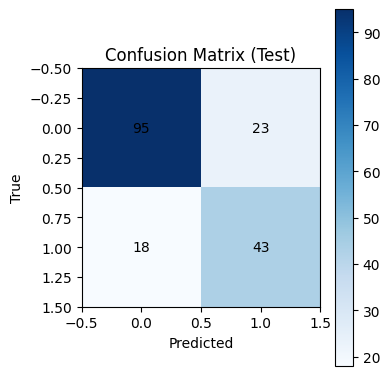

In [51]:
# ==== Part 5: apply the trained pipeline to the test set and report quality ====
from pathlib import Path
import pandas as pd
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load test if not already loaded
def safe_read_csv(name: str) -> pd.DataFrame:
    p1 = Path(name); p2 = Path('/mnt/data')/name
    if p1.exists(): return pd.read_csv(p1)
    if p2.exists(): return pd.read_csv(p2)
    raise FileNotFoundError(f"Could not find {name}")

try:
    test
except NameError:
    test = safe_read_csv('titanic_test.csv')

# Split labels if available
if 'Survived' in test.columns:
    y_test = test['Survived']
    X_test = test.drop(columns=['Survived'])
else:
    y_test = None
    X_test = test

# Predict on test
y_pred = best_model.predict(X_test)

# Show first 5 predictions (+ probabilities if supported)
preview = X_test.head(5).copy()
if hasattr(best_model, "predict_proba"):
    proba = best_model.predict_proba(X_test)[:, 1]
    preview["pred"] = y_pred[:5]
    preview["pred_proba_pos"] = proba[:5]
else:
    preview["pred"] = y_pred[:5]

print("First 5 predictions on test:")
display(preview)

# Quality on test with the SAME metric as CV: F1 (positive=1)
if y_test is not None:
    test_f1 = f1_score(y_test, y_pred, average='binary', pos_label=1)
    print(f"\n✅ Test F1 (positive=1): {test_f1:.4f}\n")
    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Optional: Confusion Matrix for clarity (matplotlib only)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    plt.imshow(cm, cmap='Blues')
    plt.title("Confusion Matrix (Test)")
    plt.xlabel("Predicted"); plt.ylabel("True")
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha='center', va='center')
    plt.colorbar(); plt.tight_layout(); plt.show()
else:
    print("\nℹ️ Test set has no 'Survived' labels → reporting predictions only (no F1).")
